In [7]:
# Importing libraries
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules,fpgrowth
from mlxtend.preprocessing import TransactionEncoder
from IPython.display import display


In [2]:
df = pd.read_csv( 'basket.csv')
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10
0,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sausage,whole milk,semi-finished bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Step 1: Convert the DataFrame to a list of transactions
transactions = df.apply(lambda row: set(row.dropna()), axis=1).tolist()

# Step 2: One-hot encode the transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
encoded_df = pd.DataFrame(te_ary, columns=te.columns_)

# Display the encoded dataframe
display(encoded_df.head())

# Step 3: Apply Apriori algorithm to find frequent itemsets
frequent_itemsets_ap = apriori(encoded_df, min_support=0.01, use_colnames=True)
frequent_itemsets_fp = fpgrowth(encoded_df, min_support=0.01, use_colnames=True)

# Step 4: Generate association rules
rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.05)
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.05)
# Show the results
print("Frequent Itemsets for Apriori:")
display(frequent_itemsets_ap)

print("Frequent Itemsets for FP-growth:")
display(frequent_itemsets_fp)

print("\nAssociation Rules for Apriori:")
display(rules_ap)

print("\nAssociation Rules for FP-growth:")
display(rules_fp)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Frequent Itemsets for Apriori:


,support,itemsets
0,0.021386,(UHT-milk)
1,0.033950,(beef)
2,0.021787,(berries)
3,0.016574,(beverages)
4,0.045312,(bottled beer)
...,...,...
64,0.010559,"(rolls/buns, other vegetables)"
65,0.014837,"(whole milk, other vegetables)"
66,0.013968,"(rolls/buns, whole milk)"
67,0.011629,"(soda, whole milk)"


Frequent Itemsets for FP-growth:


,support,itemsets
0,0.157923,(whole milk)
1,0.051728,(pastry)
2,0.018780,(salty snack)
3,0.085879,(yogurt)
4,0.060349,(sausage)
...,...,...
64,0.011161,"(yogurt, whole milk)"
65,0.011629,"(soda, whole milk)"
66,0.013968,"(rolls/buns, whole milk)"
67,0.010559,"(rolls/buns, other vegetables)"



Association Rules for Apriori:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117,-0.234091
1,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249,-0.236553
2,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928,-0.262461
3,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551,-0.254477
4,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
5,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
6,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636,-0.260917
7,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,-0.003707,0.974663,-0.274587
8,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
9,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508



Association Rules for FP-growth:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
1,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
2,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636,-0.260917
3,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,-0.003707,0.974663,-0.274587
4,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
5,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
6,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117,-0.234091
7,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249,-0.236553
8,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928,-0.262461
9,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551,-0.254477


In [44]:
# adding antecedents to consequents

rules_ap['Association'] = rules_ap['antecedents'].astype(str) + '->' + rules_ap['consequents'].astype(str)
rules_fp['Association'] = rules_fp['antecedents'].astype(str) + '->' + rules_fp['consequents'].astype(str)	

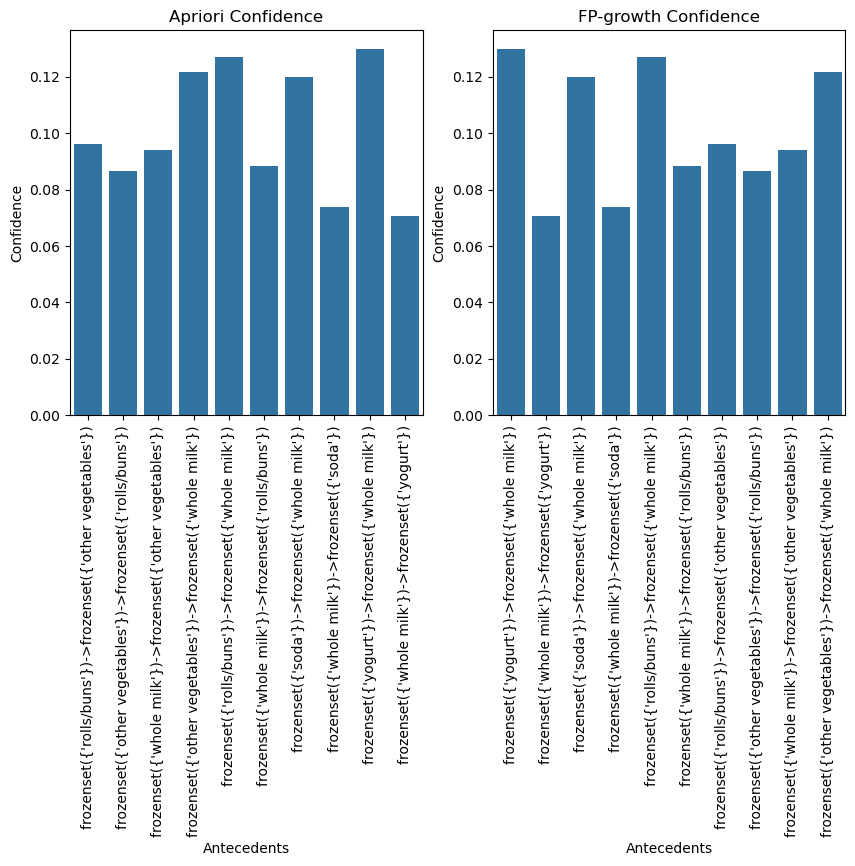

In [45]:
# plotting rules for Apriori with confidence support and lift with barcharts
# with fp growth bars beside them
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(rules_ap,x = 'Association', y = 'confidence')
plt.xlabel('Antecedents')
plt.ylabel('Confidence')
plt.title('Apriori Confidence')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(rules_fp,x = 'Association', y = 'confidence')
plt.xlabel('Antecedents')
plt.ylabel('Confidence')
plt.title('FP-growth Confidence')
plt.xticks(rotation=90)
plt.show()


In [46]:
# saving rules for each model
rules_ap.to_csv('rules_ap.csv')
rules_fp.to_csv('rules_fp.csv')
